In [21]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import get_cmap

In [22]:
# Load and Open netcdf file
ncfile = Dataset("../brianjs/MCS_LLJ_study/obs_reflectivity/refc_08_23_2015.nc")

In [23]:
# Convert netcdf variables to python variables
comp_refl = ncfile.variables['REFC_P0_L200_GLL0'][18,:,:] #[time,north-south,east-west]
lat = ncfile.variables['lat_0'][:]
lon = ncfile.variables['lon_0'][:]

In [24]:
# Create map/domain
fig = plt.figure(figsize=(12,9))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
map = Basemap(projection='lcc',llcrnrlon=-105.90325927734375,llcrnrlat=31.57733917236328,
             urcrnrlon=-85.45672307421875,urcrnrlat=46.195133209228516,resolution='i',
             lat_1=10.,lat_2=20.,lon_0=-95.,ax=ax)

In [25]:
# Add geographical lines
parallels = np.arange(30,50,4.)
meridians = np.arange(-110, -80, 4.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawstates()
map.drawcountries()

In [26]:
# Transform lat/lon to map coords
lons, lats = np.meshgrid(lon, lat)
x, y = map(lons,lats)

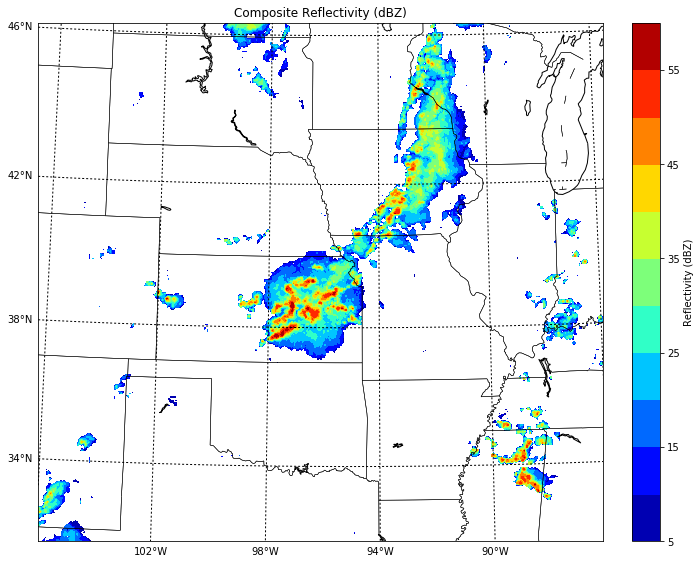

In [27]:
#Plot everything
levels = [5,10,15,20,25,30,35,40,45,50,55,60]
dbz = map.contourf(x,y,comp_refl,levels,cmap=get_cmap("jet"))
cb = map.colorbar(dbz,"right",size="5%",pad="5%")
plt.title("Composite Reflectivity (dBZ)")
cb.set_label("Reflectivity (dBZ)")
plt.show()